<a href="https://colab.research.google.com/github/purnankether/Data-Science-Machine-Learning/blob/main/Loan_Default_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Load the previously generated dummy dataset
file_path = "Dataset_Python_EDA.xlsx"
df = pd.read_excel(file_path)
df


,Customer_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term_Years,Defaulted
0,1,56.0,21864.85,649.0,177893,20,0
1,2,69.0,29498.27,737.0,209432,30,1
2,3,46.0,59544.58,614.0,193072,20,1
3,4,32.0,36399.19,706.0,249903,15,0
4,5,60.0,57140.64,750.0,180839,25,0
...,...,...,...,...,...,...,...
95,96,NaN,50984.74,678.0,214249,30,0
96,97,NaN,67538.11,NaN,180958,10,0
97,98,58.0,63099.75,671.0,227506,15,0
98,99,46.0,53084.75,693.0,211173,25,0


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,5
Income,5
Credit_Score,5
Loan_Amount,0
Loan_Term_Years,0
Defaulted,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median', 'most_frequent'

# Select numerical columns for imputation (SimpleImputer works with numerical data)
numerical_cols = ['Age', 'Income', 'Credit_Score', 'Loan_Amount']

# Fit and transform the data
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
df

,Customer_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term_Years,Defaulted
0,1,56.000000,21864.85,649.000000,177893.0,20,0
1,2,69.000000,29498.27,737.000000,209432.0,30,1
2,3,46.000000,59544.58,614.000000,193072.0,20,1
3,4,32.000000,36399.19,706.000000,249903.0,15,0
4,5,60.000000,57140.64,750.000000,180839.0,25,0
...,...,...,...,...,...,...,...
95,96,42.736842,50984.74,678.000000,214249.0,30,0
96,97,42.736842,67538.11,698.305263,180958.0,10,0
97,98,58.000000,63099.75,671.000000,227506.0,15,0
98,99,46.000000,53084.75,693.000000,211173.0,25,0


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term_Years,0
Defaulted,0


In [ ]:
# Drop missing values for clean analysis
df = df.dropna()

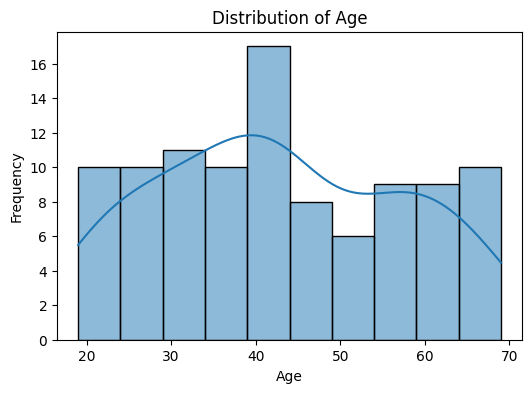

In [ ]:
# Histogram of Age
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

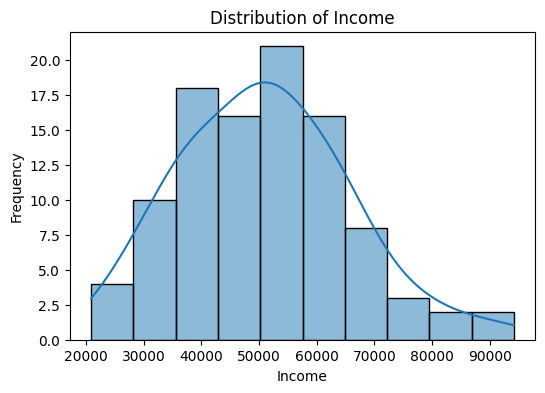

In [ ]:
# Histogram of Income
plt.figure(figsize=(6, 4))
sns.histplot(df["Income"], bins=10, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

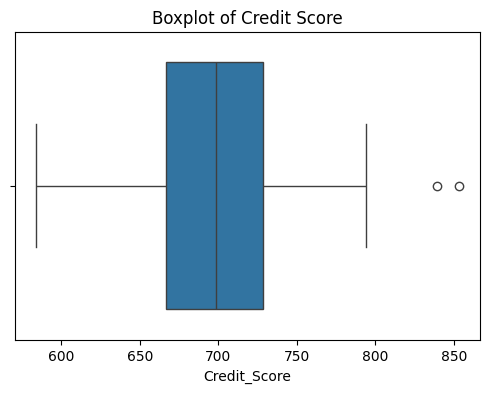

In [ ]:
# Boxplot of Credit Score
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Credit_Score"])
plt.title("Boxplot of Credit Score")
plt.show()

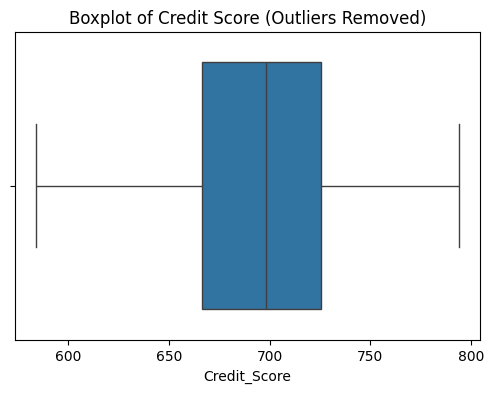

In [ ]:
# prompt: remove the outlier from credit score

# Calculate the IQR for Credit_Score
Q1 = df['Credit_Score'].quantile(0.25)
Q3 = df['Credit_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['Credit_Score'] >= lower_bound) & (df['Credit_Score'] <= upper_bound)]

#Now df_no_outliers contains the data without Credit Score outliers

# You can then continue with your analysis using df_no_outliers.
# For example, you can recreate the boxplot to visualize the effect of outlier removal
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_no_outliers["Credit_Score"])
plt.title("Boxplot of Credit Score (Outliers Removed)")
plt.show()


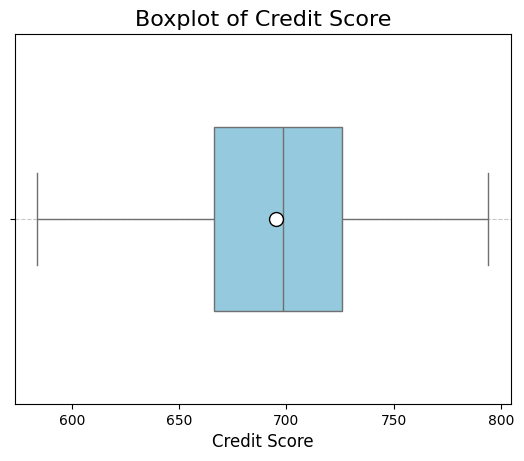

In [ ]:
# Create the boxplot
sns.boxplot(x=df_no_outliers["Credit_Score"],
            # Add customizations here:
            width=0.5,  # Adjust box width
            color="skyblue",  # Change box color
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8},  # Customize outliers
            showmeans=True, # Show the mean
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"}) # Customize the mean marker
plt.title("Boxplot of Credit Score", fontsize=16)  # Customize title and font size
plt.xlabel("Credit Score", fontsize=12)  # Customize x-axis label and font size
plt.ylabel("")  # Remove y-axis label if not needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid
plt.show()

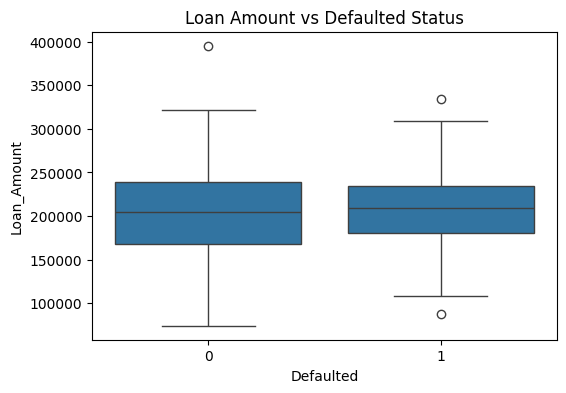

In [ ]:
# Loan Amount by Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x="Defaulted", y="Loan_Amount", data=df)
plt.title("Loan Amount vs Defaulted Status")
plt.show()

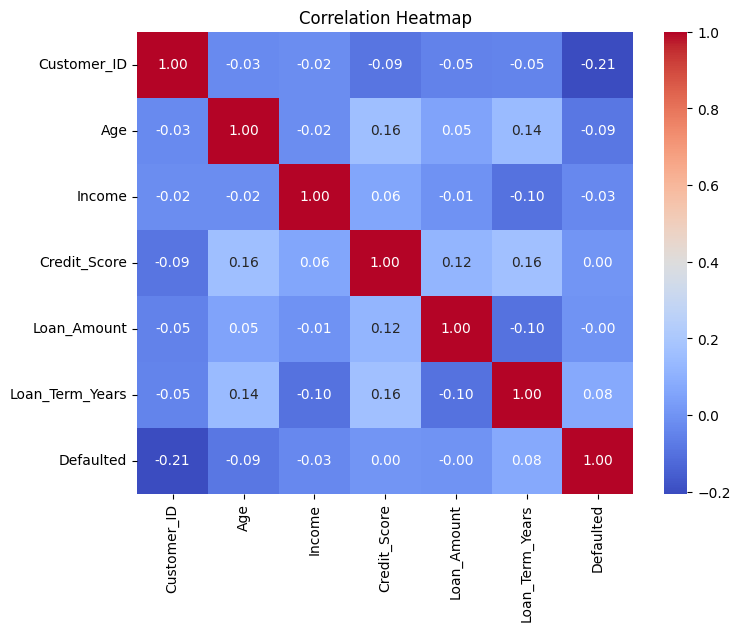

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
